In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [250]:
df=pd.read_csv("global_power_plant")
pd.set_option("display.max_columns",None)

In [251]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
df.shape

(907, 27)

In [253]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we can see here that 3 columns here are completely null. so we will remove those columns further

<AxesSubplot:>

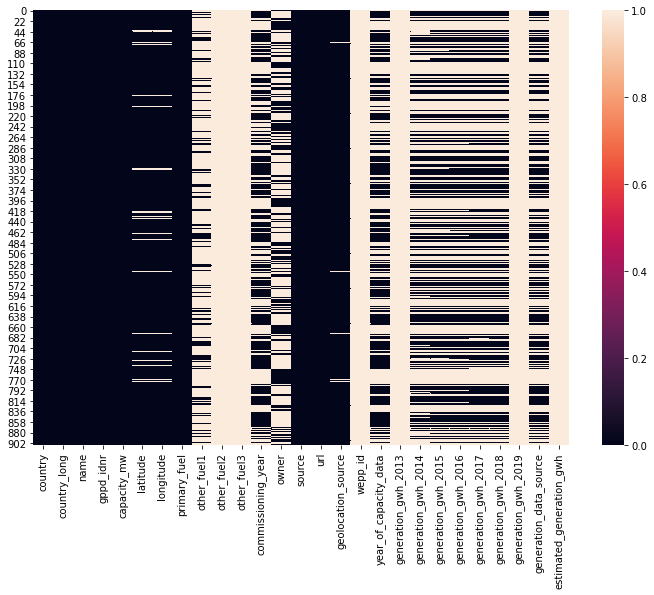

In [254]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [255]:
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [256]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now lets remove some of the useless columns in the dataset which has no use

In [257]:
df.drop(['country','name','gppd_idnr','owner','url'],axis=1,inplace=True)

In [258]:
df

,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we have removed the columns which were useless and had  completely null values in the dataset. now lets replace other NAN with median and mode values

In [259]:
df.dtypes

country_long               object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
source                     object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [260]:
df.isnull().sum()

country_long                0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [261]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+":"+(str(df[column].unique())))
        print(df[column].value_counts())
        print("---------------------------------------")
    

country_long:['India']
India    907
Name: country_long, dtype: int64
---------------------------------------
primary_fuel:['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
---------------------------------------
other_fuel1:[nan 'Oil' 'Cogeneration' 'Gas']
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64
---------------------------------------
source:['National Renewable Energy Laboratory' 'Ultratech Cement ltd' 'CDM'
 'Central Electricity Authority' 'Hindustan Pvt lt' 'Dr Ssk ltd'
 'Ashok Ssk ltd' 'Shree Sugars ltd' 'Navbharat' 'Meil.In/P' 'Lancosola'
 'Indian Power ltd' 'Ballarpur Industries ltd' 'Jk Cement ltd'
 'India Ltd icl)' 'Ideal Projects ltd' 'Ugar Works ltd'
 'Vishwanath Sugars ltd' 'Hothur Pvt ltd' 'Janki Corp ltd'
 'Mysore Mills ltd' 'Sunflag Co ltd' 'Varam Pvt ltd' 

as we can see here that the datset is provided of only 1 country which is india. so we will remove it also.

In [262]:
df.drop('country_long',axis=1,inplace=True)

In [263]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

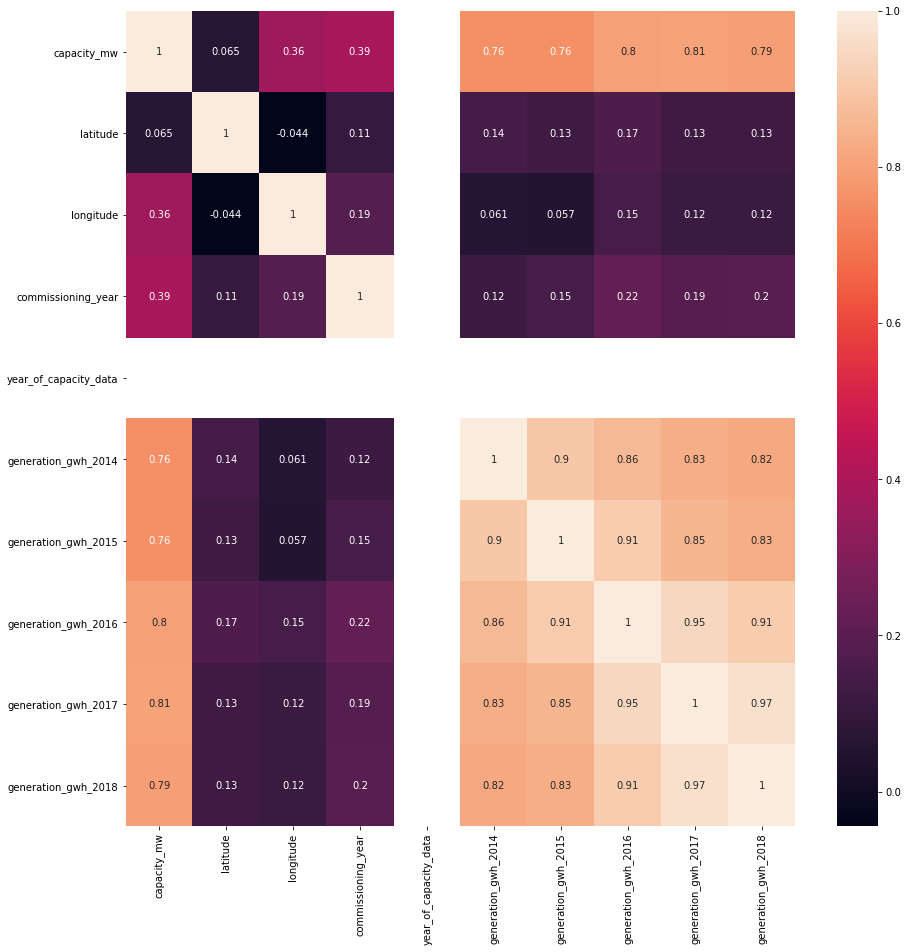

In [264]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method='spearman'),annot=True)

In [265]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes !='O']
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25]


print("Numerical features count{}".format(len(numerical_feature)))
print("Discrete features count{}".format(len(discrete_feature)))


Numerical features count10
Discrete features count5


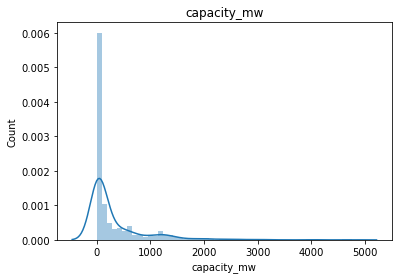

<Figure size 1080x1080 with 0 Axes>

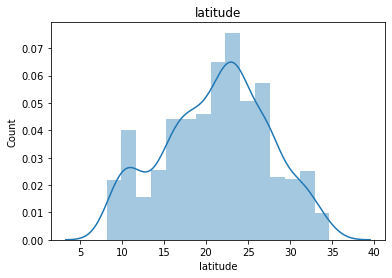

<Figure size 1080x1080 with 0 Axes>

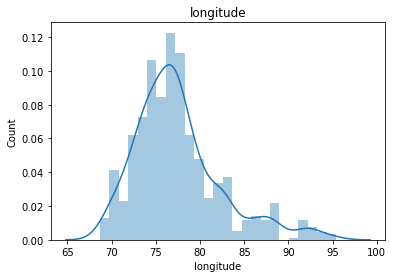

<Figure size 1080x1080 with 0 Axes>

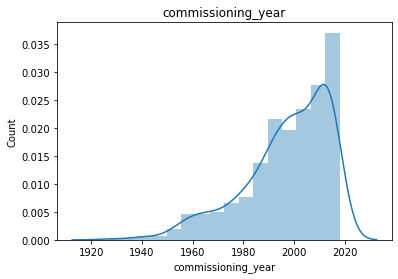

<Figure size 1080x1080 with 0 Axes>

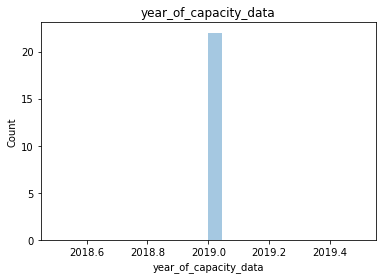

<Figure size 1080x1080 with 0 Axes>

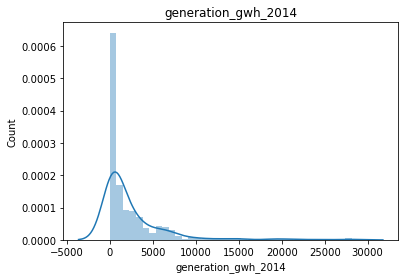

<Figure size 1080x1080 with 0 Axes>

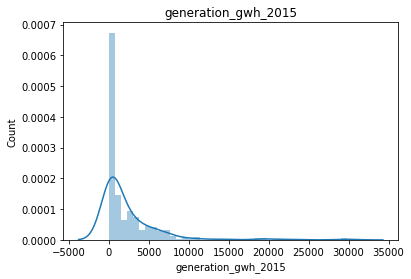

<Figure size 1080x1080 with 0 Axes>

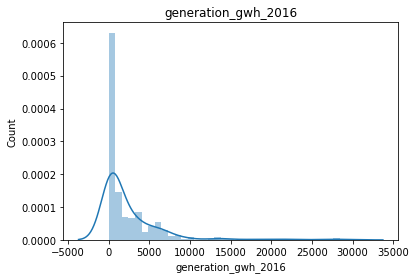

<Figure size 1080x1080 with 0 Axes>

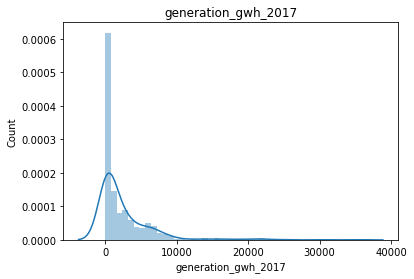

<Figure size 1080x1080 with 0 Axes>

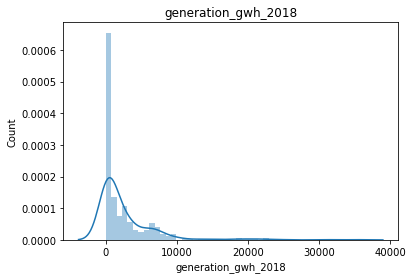

<Figure size 1080x1080 with 0 Axes>

In [266]:
for feature in numerical_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [267]:
discrete_feature

['primary_fuel',
 'other_fuel1',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_data_source']

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

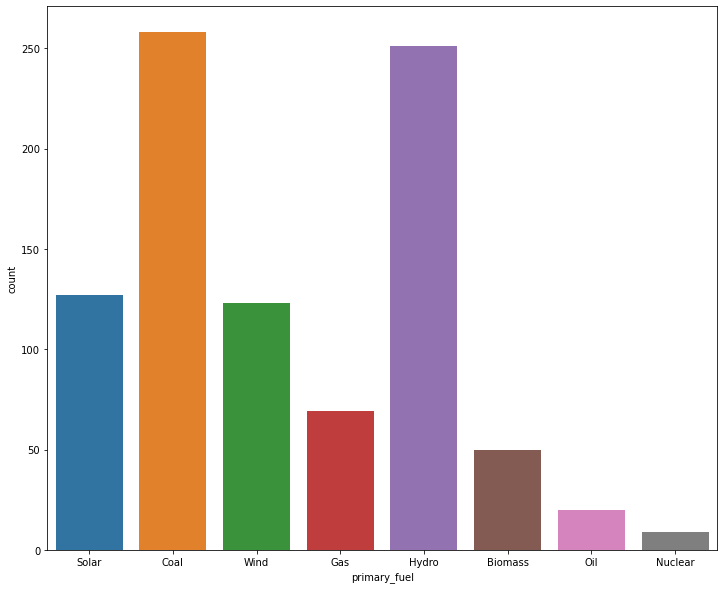

In [268]:
plt.figure(figsize=(12,10))
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

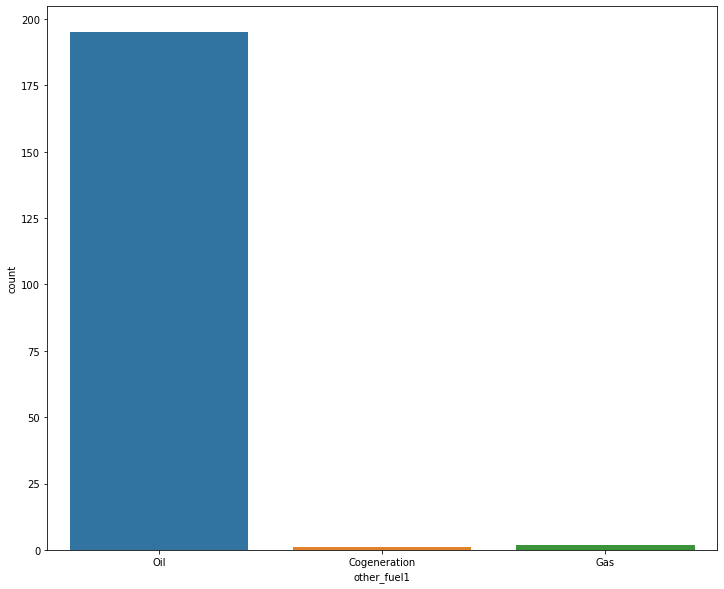

In [269]:
plt.figure(figsize=(12,10))
sns.countplot(df['other_fuel1'])

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

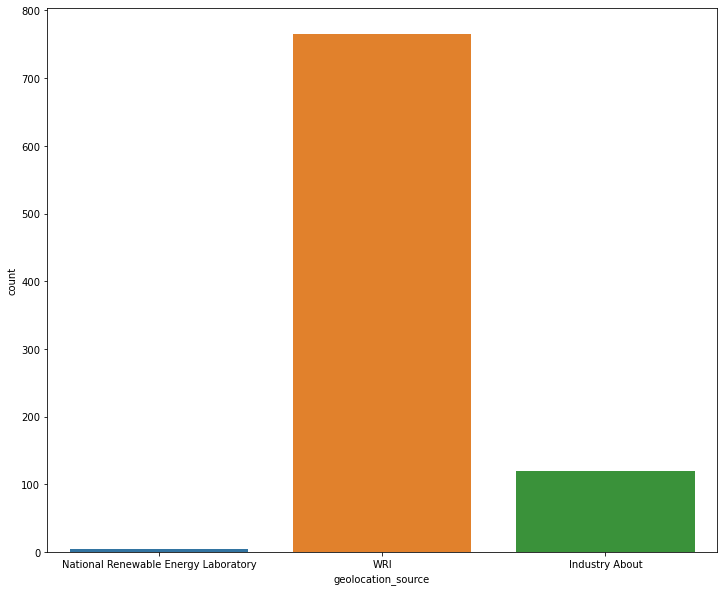

In [270]:
plt.figure(figsize=(12,10))
sns.countplot(df['geolocation_source'])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='count'>

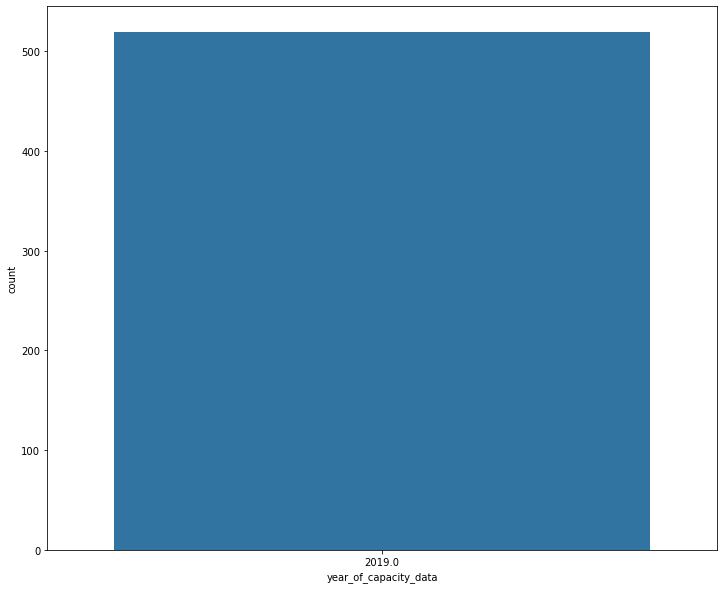

In [271]:
plt.figure(figsize=(12,10))
sns.countplot(df['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

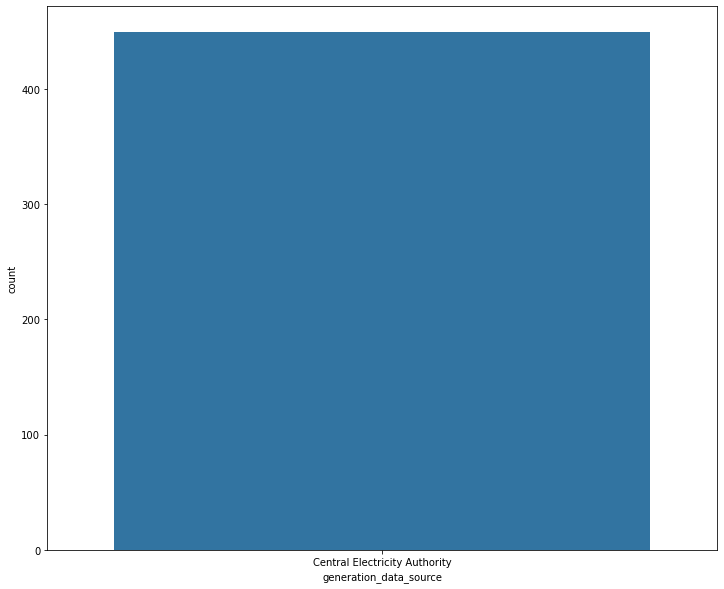

In [272]:
plt.figure(figsize=(12,10))
sns.countplot(df['generation_data_source'])

In [273]:
df.drop(['generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

In [274]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [275]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [276]:
for feature in numerical_feature:
    print(feature)


capacity_mw
latitude
longitude
commissioning_year
year_of_capacity_data
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_gwh_2018


In [277]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['primary_fuel','other_fuel1','source','geolocation_source']
for  val in list1:
    df[val]=le.fit_transform(df[val])

In [278]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,3,NaN,174,2,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,21,2,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,22,2,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,3,NaN,77,0,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,7,3,NaN,21,2,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1,3,NaN,59,2,NaN,NaN,NaN,NaN,NaN


In [279]:
df['latitude']=df['latitude'].replace(np.NAN,df['latitude'].mean())
df['longitude']=df['longitude'].replace(np.NAN,df['longitude'].mean())
df['other_fuel1']=df['other_fuel1'].replace(np.NAN,df['other_fuel1'].median())
df['commissioning_year']=df['commissioning_year'].replace(np.NAN,df['commissioning_year'].median())
df['geolocation_source']=df['geolocation_source'].replace(np.NAN,df['geolocation_source'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].replace(np.NAN,df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].replace(np.NAN,df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].replace(np.NAN,df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].replace(np.NAN,df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].replace(np.NAN,df['generation_gwh_2018'].mean())

In [280]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

now lets check the co=relation of the data

<AxesSubplot:>

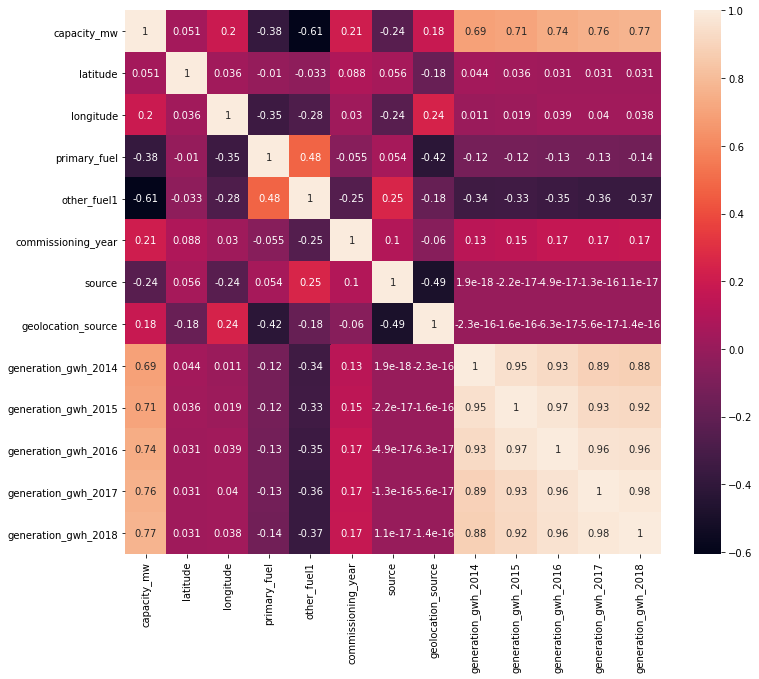

In [281]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

LETS CHECK THE CORELATION WITH THE TARGET VARIABLE

In [282]:
corr_matrix=df.corr()
corr_matrix['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.773456
generation_gwh_2017    0.757585
generation_gwh_2016    0.742221
generation_gwh_2015    0.711190
generation_gwh_2014    0.694350
commissioning_year     0.211042
longitude              0.195882
geolocation_source     0.183419
latitude               0.050984
source                -0.242122
primary_fuel          -0.380395
other_fuel1           -0.606289
Name: capacity_mw, dtype: float64

NOW LETS CHECK IF THERE IS MULTICOLEARITY PRESENT

In [283]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [284]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [285]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [286]:
calc_vif(x)

,variables,VIF
0,latitude,13.879059
1,longitude,315.769731
2,primary_fuel,5.421207
3,other_fuel1,69.473260
4,commissioning_year,439.736907
5,source,3.145790
6,geolocation_source,13.065457
7,generation_gwh_2014,20.438343
8,generation_gwh_2015,45.159714
9,generation_gwh_2016,57.828109


here 2 columns have very high rate of multicoleanirity present. so we will remove those columns

In [287]:
df.drop(['longitude','commissioning_year'],axis=1,inplace=True)


In [288]:
calc_vif(df)

,variables,VIF
0,capacity_mw,4.798105
1,latitude,11.540323
2,primary_fuel,5.418617
3,other_fuel1,35.902843
4,source,3.180787
5,geolocation_source,10.858602
6,generation_gwh_2014,20.437304
7,generation_gwh_2015,45.203392
8,generation_gwh_2016,57.772746
9,generation_gwh_2017,65.098682


now lets check the outliers in the dataset

In [289]:
continious_feature=[feature for feature in df.columns if feature not in discrete_feature]
categorical_feature=[feature for feature in df.columns if feature not in numerical_feature]

print("Continious features count{}".format(len(continious_feature)))
print("Categorical features count{}".format(len(categorical_feature)))


Continious features count8
Categorical features count4


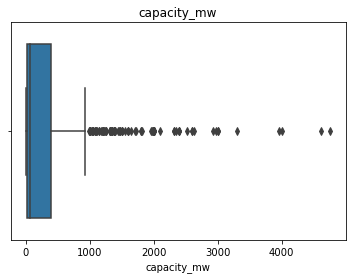

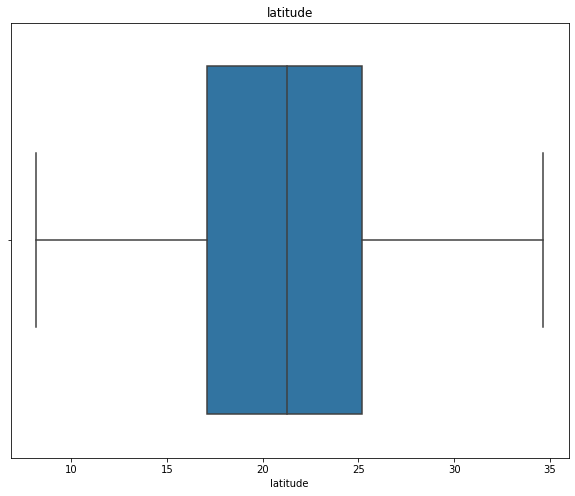

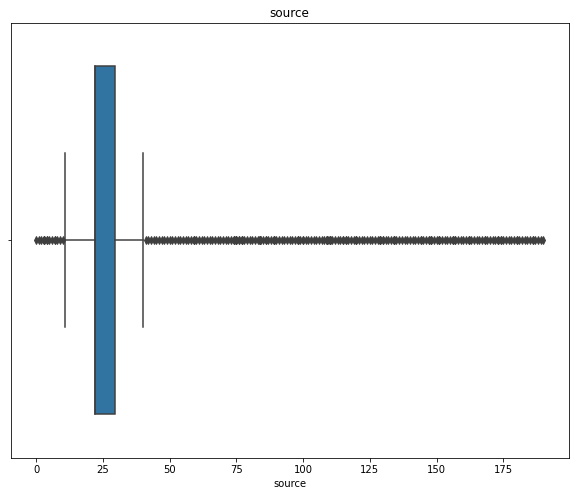

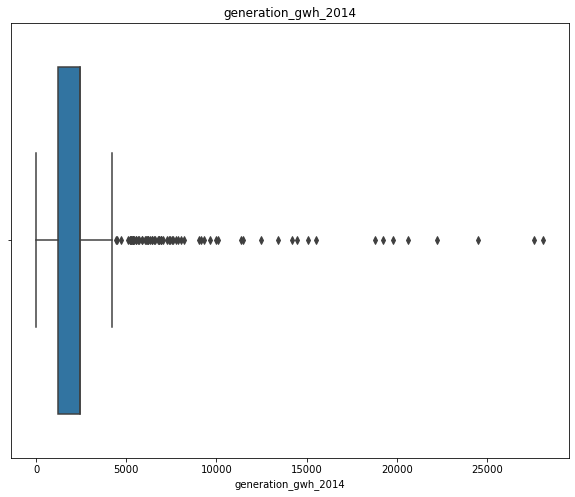

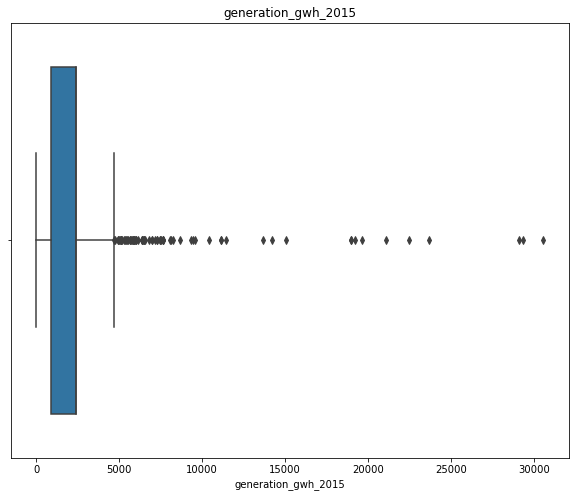

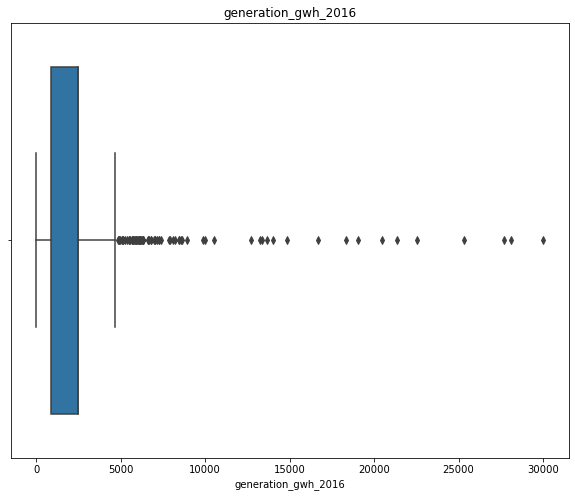

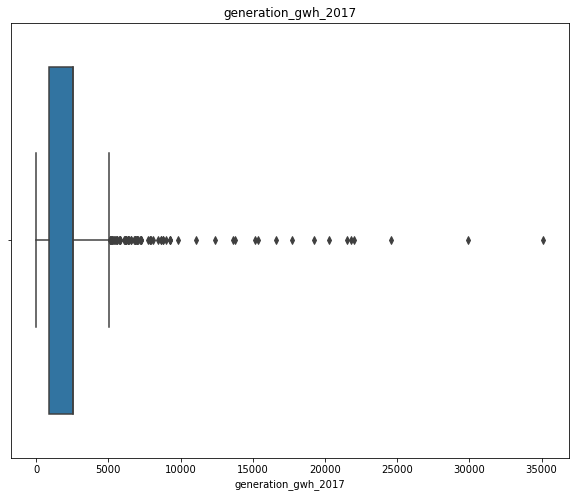

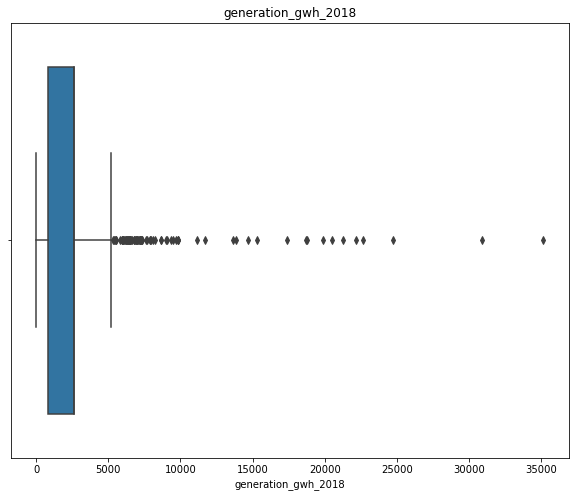

<Figure size 720x576 with 0 Axes>

In [290]:
for feature in continious_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,8))

In [291]:
for feature in continious_feature:
    print(feature)

capacity_mw
latitude
source
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_gwh_2018


In [292]:
IQR=df.capacity_mw.quantile(0.75)-df.capacity_mw.quantile(0.25)
lower_bridge=df.capacity_mw.quantile(0.25)-(IQR*1.5)
upper_bridge=df.capacity_mw.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


-536.0624999999999 938.0374999999999


In [293]:
df.loc[df['capacity_mw']>=938.03,'capacity_mw']=938.03
df.loc[df['capacity_mw']<=-536.02,'capacity_mw']=-536.02


In [294]:
IQR=df.source.quantile(0.75)-df.source.quantile(0.25)
lower_bridge=df.source.quantile(0.25)-(IQR*1.5)
upper_bridge=df.source.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


10.75 40.75


In [295]:
df.loc[df['source']>=40.75,'source']=40.75
df.loc[df['source']<=40.75,'source']=40.75

In [296]:
IQR=df.generation_gwh_2014.quantile(0.75)-df.generation_gwh_2014.quantile(0.25)
lower_bridge=df.generation_gwh_2014.quantile(0.25)-(IQR*1.5)
upper_bridge=df.generation_gwh_2014.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-619.3285102945158 4262.514850490859


In [297]:
df.loc[df['generation_gwh_2014']>=4262.51,'generation_gwh_2014']=4262.51
df.loc[df['generation_gwh_2014']<=4262.51,'generation_gwh_2014']=4262.51

In [298]:
IQR=df.generation_gwh_2015.quantile(0.75)-df.generation_gwh_2015.quantile(0.25)
lower_bridge=df.generation_gwh_2015.quantile(0.25)-(IQR*1.5)
upper_bridge=df.source.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


-1352.3404189421126 2309.0904189421126


In [299]:
df.loc[df['generation_gwh_2015']>=2309.09,'generation_gwh_2015']=2309.09
df.loc[df['generation_gwh_2015']<=40.75,'generation_gwh_2015']=40.75

In [300]:
IQR=df.generation_gwh_2016.quantile(0.75)-df.generation_gwh_2016.quantile(0.25)
lower_bridge=df.generation_gwh_2016.quantile(0.25)-(IQR*1.5)
upper_bridge=df.generation_gwh_2016.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1460.6547529523639 4825.091825587273


In [301]:
df.loc[df['generation_gwh_2016']>=4825.09,'generation_gwh_2016']=4825.09
df.loc[df['generation_gwh_2016']<=-1460.65,'generation_gwh_2016']=-1460.65

In [302]:
IQR=df.generation_gwh_2017.quantile(0.75)-df.generation_gwh_2017.quantile(0.25)
lower_bridge=df.generation_gwh_2017.quantile(0.25)-(IQR*1.5)
upper_bridge=df.generation_gwh_2017.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1615.1518317653058 5045.50598627551


In [303]:
df.loc[df['generation_gwh_2017']>=5045.50,'generation_gwh_2017']=5045.50
df.loc[df['generation_gwh_2017']<=-1615.15,'generation_gwh_2017']=-1615.15

In [304]:
IQR=df.generation_gwh_2018.quantile(0.75)-df.generation_gwh_2018.quantile(0.25)
lower_bridge=df.generation_gwh_2018.quantile(0.25)-(IQR*1.5)
upper_bridge=df.generation_gwh_2018.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1839.1002972789593 5264.746736226598


In [305]:
df.loc[df['generation_gwh_2018']>=5264.74,'generation_gwh_2018']=5264.74
df.loc[df['generation_gwh_2018']<=-1839.10,'generation_gwh_2018']=-1839.10

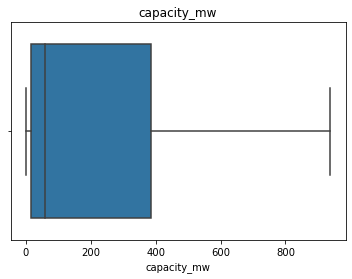

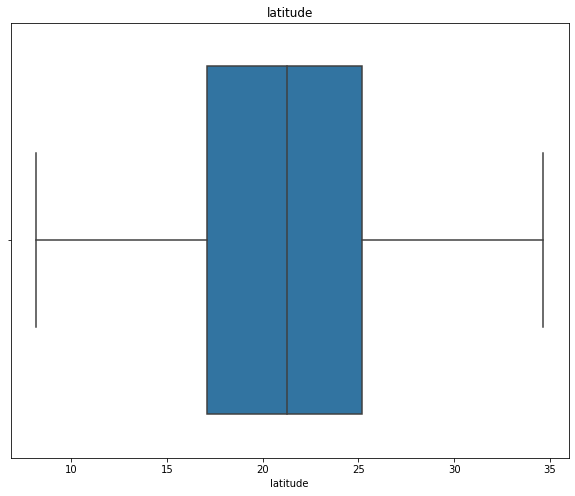

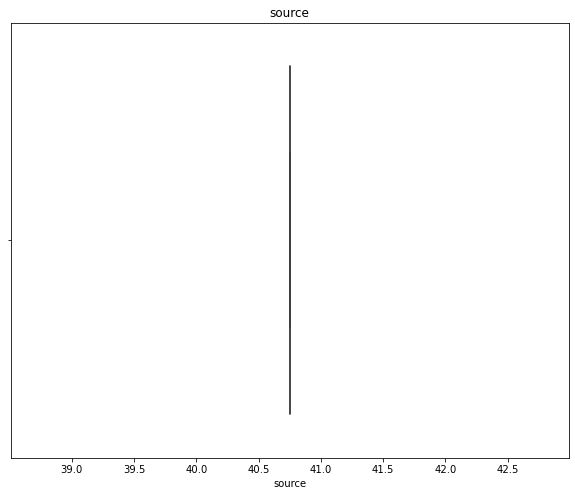

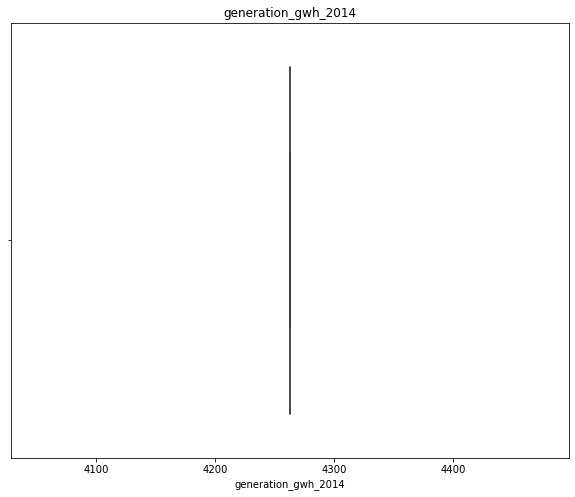

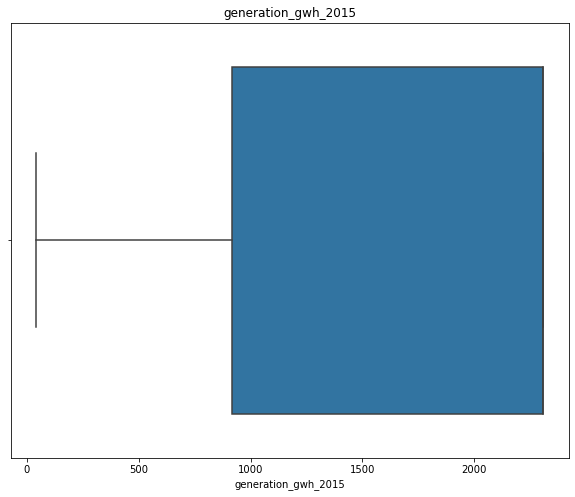

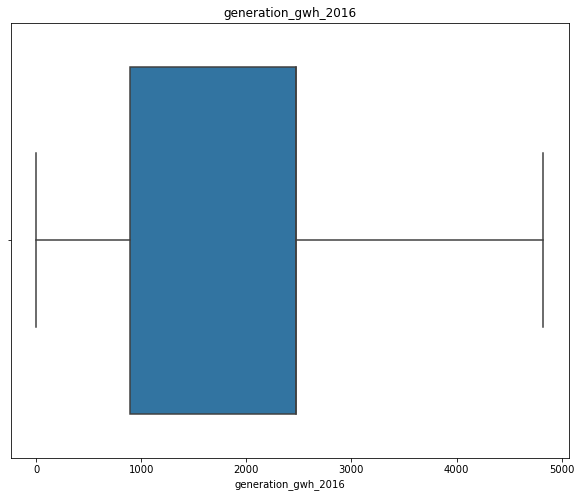

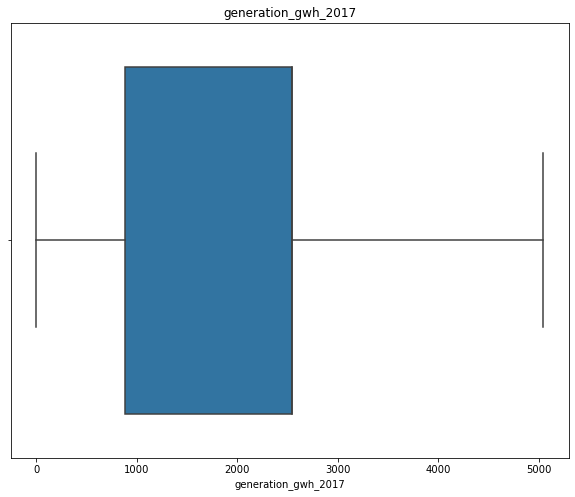

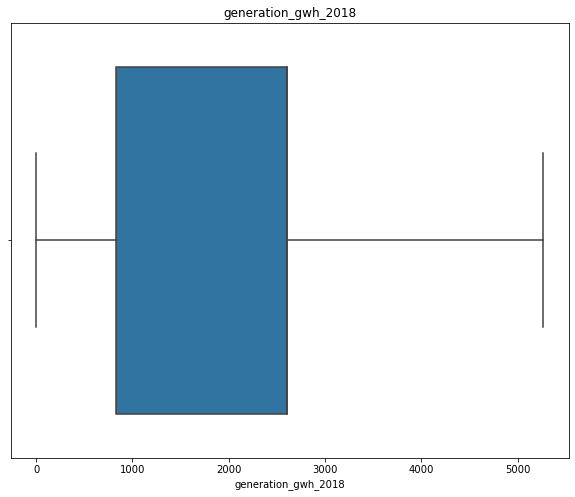

<Figure size 720x576 with 0 Axes>

In [306]:
for feature in continious_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,8))

we can see that outliers have been removed from the dataset

In [307]:
df

,capacity_mw,latitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,28.1839,6,3,40.75,1,4262.51,2309.090,2467.936859,2547.759305,2600.804099
1,98.00,24.7663,1,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099
2,39.20,21.9038,7,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099
3,135.00,23.8712,2,3,40.75,2,4262.51,843.747,886.004428,663.774500,626.239128
4,938.03,21.9603,1,2,40.75,2,4262.51,2309.090,4825.090000,5045.500000,5264.740000
...,...,...,...,...,...,...,...,...,...,...,...
902,938.03,16.2949,1,2,40.75,2,4262.51,40.750,233.596650,865.400000,686.500000
903,3.00,12.8932,6,3,40.75,0,4262.51,2309.090,2467.936859,2547.759305,2600.804099
904,25.50,15.2758,7,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099
905,80.00,24.3500,1,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099


now lets  the data for better performance of the model

<AxesSubplot:>

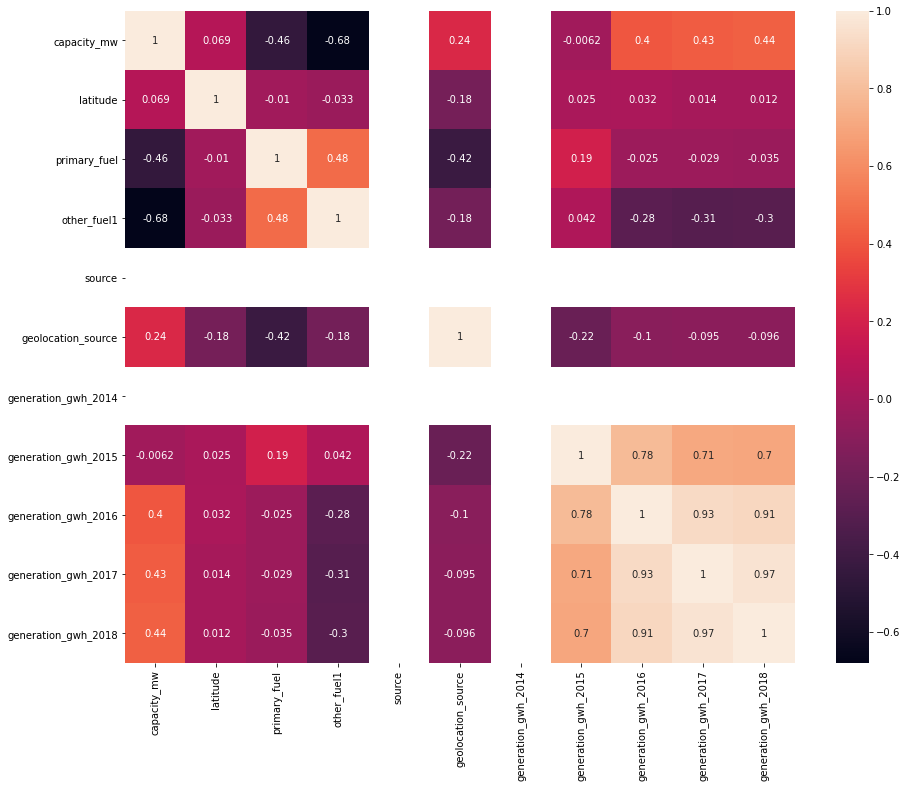

In [308]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [309]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

capacity_mw


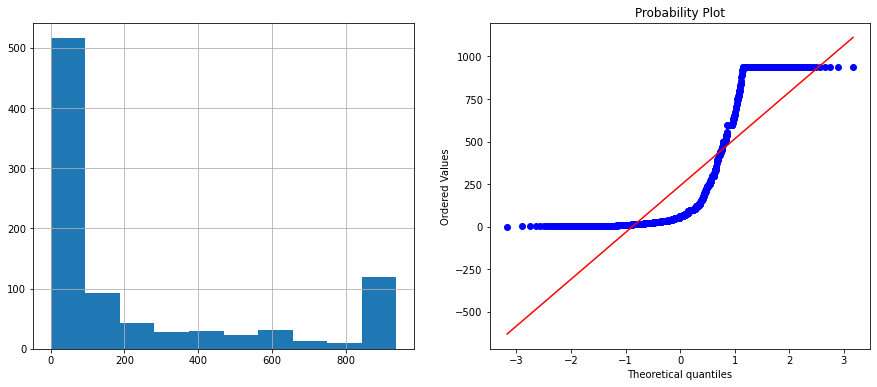

latitude


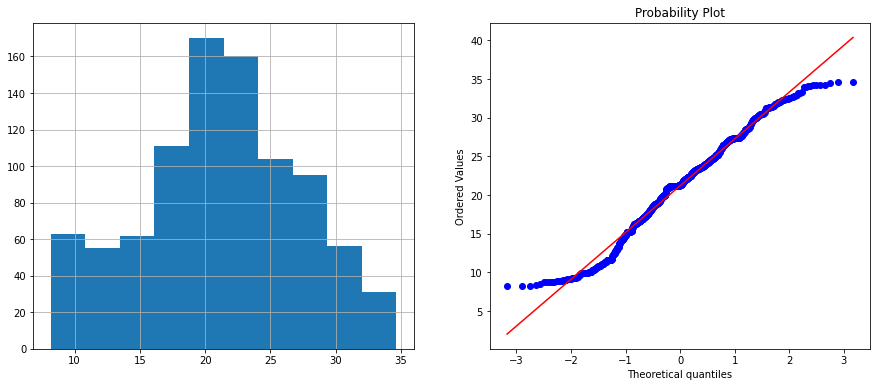

source


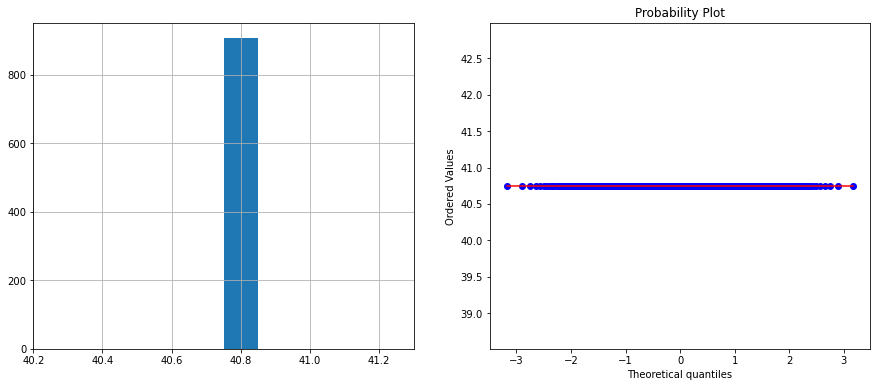

generation_gwh_2014


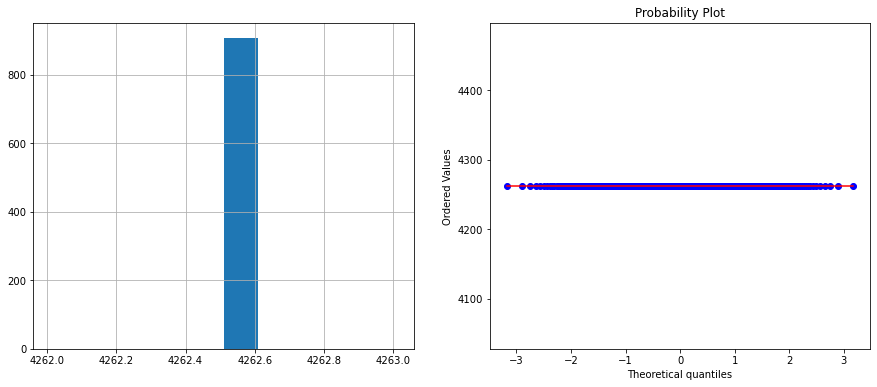

generation_gwh_2015


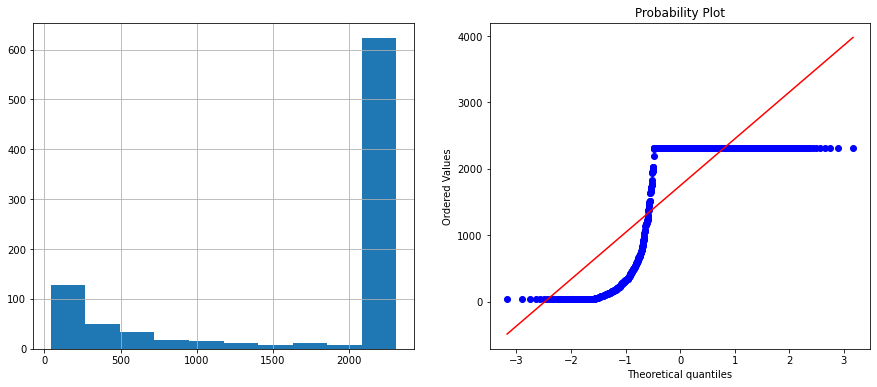

generation_gwh_2016


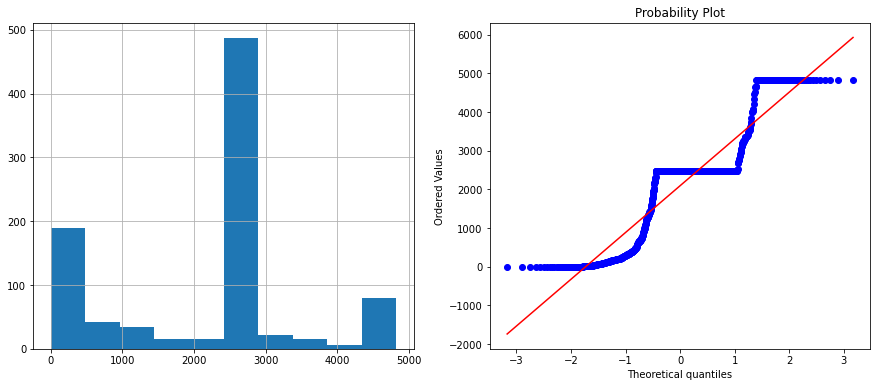

generation_gwh_2017


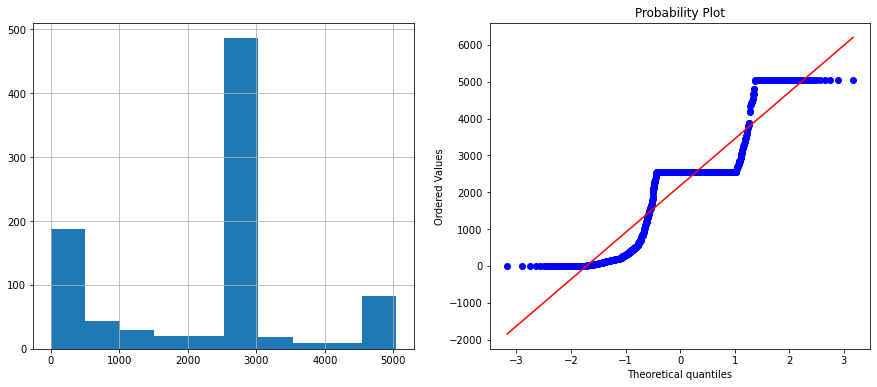

generation_gwh_2018


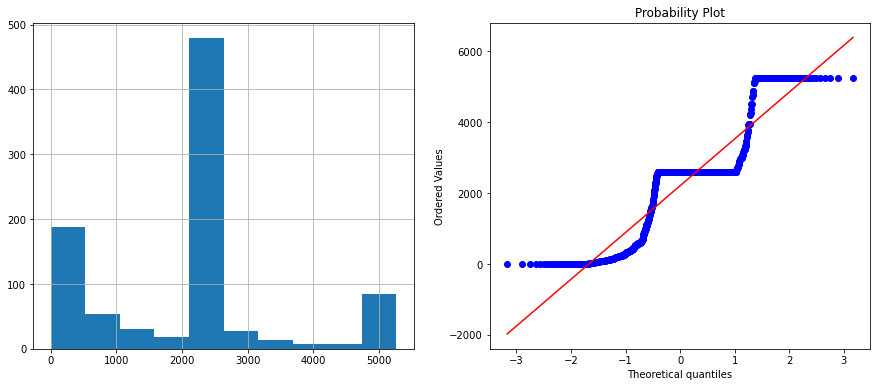

In [310]:
for feature in continious_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

we can clearly see that the distribution among the data among the columns. lets normalize it using standard scaler

In [311]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']


In [312]:
from sklearn.preprocessing import MinMaxScaler

In [313]:
scaler=MinMaxScaler()


In [314]:
x=scaler.fit_transform(x)

In [315]:
x

array([[0.00266516, 0.75585062, 1.        , ..., 0.51147996, 0.50495675,
        0.49400428],
       [0.10447427, 0.62678766, 1.        , ..., 0.51147996, 0.50495675,
        0.49400428],
       [0.04178971, 0.51868762, 1.        , ..., 0.51147996, 0.50495675,
        0.49400428],
       ...,
       [0.02718463, 0.26838645, 1.        , ..., 0.51147996, 0.50495675,
        0.49400428],
       [0.08528512, 0.61106642, 1.        , ..., 0.51147996, 0.50495675,
        0.49400428],
       [0.01759006, 0.06667271, 1.        , ..., 0.51147996, 0.50495675,
        0.49400428]])

In [316]:
from sklearn.model_selection import train_test_split


In [317]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [318]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [319]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(classification_report(y_test,predlr))
print(confusion_matrix(y_test,predlr))

0.7136563876651982
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.88      0.81      0.85        64
           2       0.00      0.00      0.00        20
           3       0.72      0.77      0.75        65
           5       0.00      0.00      0.00         3
           6       1.00      0.96      0.98        28
           7       0.46      0.94      0.62        35

    accuracy                           0.71       227
   macro avg       0.44      0.50      0.46       227
weighted avg       0.65      0.71      0.67       227

[[ 0  0  0  0  0  0 12]
 [ 0 52  0  2  0  0 10]
 [ 0  5  0 13  0  0  2]
 [ 0  2  0 50  0  0 13]
 [ 0  0  0  2  0  0  1]
 [ 0  0  0  0  0 27  1]
 [ 0  0  0  2  0  0 33]]


In [320]:
from sklearn.naive_bayes import MultinomialNB

In [321]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(classification_report(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))

0.5638766519823789
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.44      0.84      0.58        64
           2       0.00      0.00      0.00        20
           3       0.61      0.74      0.67        65
           5       0.00      0.00      0.00         3
           6       1.00      0.93      0.96        28
           7       0.00      0.00      0.00        35

    accuracy                           0.56       227
   macro avg       0.29      0.36      0.32       227
weighted avg       0.42      0.56      0.47       227

[[ 0 12  0  0  0  0  0]
 [ 0 54  0 10  0  0  0]
 [ 0  6  0 14  0  0  0]
 [ 0 17  0 48  0  0  0]
 [ 0  1  0  2  0  0  0]
 [ 0  1  0  1  0 26  0]
 [ 0 31  0  4  0  0  0]]


In [322]:
from sklearn.svm import SVC


In [323]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))

0.6960352422907489
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.81      0.81      0.81        64
           2       0.00      0.00      0.00        20
           3       0.75      0.69      0.72        65
           5       0.00      0.00      0.00         3
           6       1.00      0.93      0.96        28
           7       0.45      1.00      0.62        35

    accuracy                           0.70       227
   macro avg       0.43      0.49      0.45       227
weighted avg       0.64      0.70      0.65       227

[[ 0  0  0  0  0  0 12]
 [ 0 52  0  0  0  0 12]
 [ 0  5  0 13  0  0  2]
 [ 0  6  0 45  0  0 14]
 [ 0  0  0  2  0  0  1]
 [ 0  1  0  0  0 26  1]
 [ 0  0  0  0  0  0 35]]


In [324]:
from sklearn.tree import DecisionTreeClassifier


In [325]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))


0.7312775330396476
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.78      0.88      0.82        64
           2       0.33      0.25      0.29        20
           3       0.73      0.72      0.73        65
           5       0.20      0.33      0.25         3
           6       1.00      1.00      1.00        28
           7       0.73      0.63      0.68        35

    accuracy                           0.73       227
   macro avg       0.62      0.63      0.62       227
weighted avg       0.73      0.73      0.73       227

[[ 7  2  0  3  0  0  0]
 [ 1 56  5  0  0  0  2]
 [ 0  3  5  9  2  0  1]
 [ 3  3  5 47  2  0  5]
 [ 0  1  0  1  1  0  0]
 [ 0  0  0  0  0 28  0]
 [ 2  7  0  4  0  0 22]]


In [326]:
from sklearn.neighbors import KNeighborsClassifier

In [327]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
predknc=knc.predict(x_test)
print(accuracy_score(y_test,predknc))
print(classification_report(y_test,predknc))
print(confusion_matrix(y_test,predknc))

0.7709251101321586
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.81      0.89      0.85        64
           2       0.31      0.20      0.24        20
           3       0.80      0.82      0.81        65
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       0.96      0.96      0.96        28
           7       0.74      0.66      0.70        35

    accuracy                           0.77       227
   macro avg       0.54      0.56      0.54       227
weighted avg       0.76      0.77      0.76       227

[[11  0  0  1  0  0  0  0]
 [ 1 57  2  2  0  0  0  2]
 [ 0  5  4  7  1  2  0  1]
 [ 1  2  6 53  0  0  0  3]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0 27  1]
 [ 3  6  1  1  0  0  1 23]]


we can see here that our model is not accurate due to biasness in the outpul variable. lets fix it using SMOTE

In [328]:
from imblearn.over_sampling import SMOTE

In [329]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_train,y_train)


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

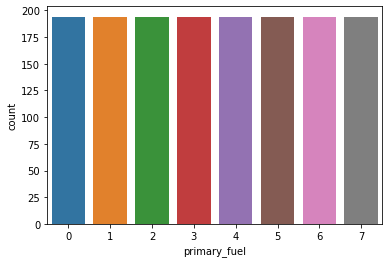

In [330]:
sns.countplot(trainy)

In [331]:
lr=LogisticRegression()
lr.fit(trainx,trainy)
lr.score(trainx,trainy)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(classification_report(y_test,predlr))
print(confusion_matrix(y_test,predlr))

0.6255506607929515
              precision    recall  f1-score   support

           0       0.28      0.83      0.42        12
           1       0.94      0.75      0.83        64
           2       0.37      0.35      0.36        20
           3       0.89      0.49      0.63        65
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       1.00      0.96      0.98        28
           7       0.43      0.51      0.47        35

    accuracy                           0.63       227
   macro avg       0.49      0.49      0.46       227
weighted avg       0.76      0.63      0.66       227

[[10  0  0  0  0  0  0  2]
 [ 4 48  1  0  0  3  0  8]
 [ 2  2  7  2  3  4  0  0]
 [ 3  1 11 32  2  4  0 12]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0 27  1]
 [17  0  0  0  0  0  0 18]]


In [332]:
mnb=MultinomialNB()
mnb.fit(trainx,trainy)
mnb.score(trainx,trainy)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(classification_report(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))

0.4801762114537445
              precision    recall  f1-score   support

           0       0.33      0.83      0.48        12
           1       0.78      0.28      0.41        64
           2       0.28      0.45      0.35        20
           3       0.73      0.37      0.49        65
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       1.00      0.93      0.96        28
           7       0.41      0.63      0.49        35

    accuracy                           0.48       227
   macro avg       0.44      0.44      0.40       227
weighted avg       0.66      0.48      0.51       227

[[10  0  0  0  0  0  0  2]
 [ 2 18  8  3 23  0  0 10]
 [ 1  2  9  4  2  1  0  1]
 [ 4  3 15 24  0  3  0 16]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0 26  2]
 [13  0  0  0  0  0  0 22]]


In [333]:
knc=KNeighborsClassifier()
knc.fit(trainx,trainy)
knc.score(trainx,trainy)
predknc=knc.predict(x_test)
print(accuracy_score(y_test,predknc))
print(classification_report(y_test,predknc))
print(confusion_matrix(y_test,predknc))

0.7092511013215859
              precision    recall  f1-score   support

           0       0.46      0.92      0.61        12
           1       0.91      0.81      0.86        64
           2       0.32      0.35      0.33        20
           3       0.89      0.62      0.73        65
           4       0.00      0.00      0.00         0
           5       0.20      0.67      0.31         3
           6       0.96      0.96      0.96        28
           7       0.65      0.63      0.64        35

    accuracy                           0.71       227
   macro avg       0.55      0.62      0.56       227
weighted avg       0.79      0.71      0.73       227

[[11  0  0  0  0  1  0  0]
 [ 3 52  2  0  0  3  0  4]
 [ 0  2  7  3  3  3  0  2]
 [ 2  1 13 40  4  1  0  4]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  0 27  1]
 [ 8  2  0  2  0  0  1 22]]


In [334]:
dtc=DecisionTreeClassifier()
dtc.fit(trainx,trainy)
dtc.score(trainx,trainy)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))


0.7444933920704846
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.85      0.86      0.85        64
           2       0.35      0.35      0.35        20
           3       0.83      0.69      0.76        65
           4       0.00      0.00      0.00         0
           5       0.29      0.67      0.40         3
           6       1.00      1.00      1.00        28
           7       0.73      0.69      0.71        35

    accuracy                           0.74       227
   macro avg       0.57      0.62      0.58       227
weighted avg       0.77      0.74      0.76       227

[[ 8  1  1  1  0  1  0  0]
 [ 2 55  2  0  0  2  0  3]
 [ 0  1  7  6  2  2  0  2]
 [ 1  3 10 45  2  0  0  4]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 5  4  0  2  0  0  0 24]]


In [335]:
svc=SVC()
svc.fit(trainx,trainy)
svc.score(trainx,trainy)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))

0.5638766519823789
              precision    recall  f1-score   support

           0       0.18      1.00      0.31        12
           1       0.96      0.78      0.86        64
           2       0.35      0.35      0.35        20
           3       0.85      0.43      0.57        65
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       1.00      0.93      0.96        28
           7       0.28      0.14      0.19        35

    accuracy                           0.56       227
   macro avg       0.45      0.45      0.41       227
weighted avg       0.72      0.56      0.60       227

[[12  0  0  0  0  0  0  0]
 [ 8 50  0  0  0  2  0  4]
 [ 2  2  7  3  4  2  0  0]
 [13  0 13 28  4  0  0  7]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 26  2]
 [30  0  0  0  0  0  0  5]]


lets check some ensemble algorithms 

In [336]:
from sklearn.ensemble import RandomForestClassifier


In [337]:
rf=RandomForestClassifier()
rf.fit(trainx,trainy)
rf.score(trainx,trainy)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))


0.762114537444934
              precision    recall  f1-score   support

           0       0.44      0.67      0.53        12
           1       0.85      0.88      0.86        64
           2       0.33      0.20      0.25        20
           3       0.84      0.78      0.81        65
           4       0.00      0.00      0.00         0
           5       0.33      0.67      0.44         3
           6       1.00      1.00      1.00        28
           7       0.73      0.69      0.71        35

    accuracy                           0.76       227
   macro avg       0.57      0.61      0.58       227
weighted avg       0.77      0.76      0.76       227

[[ 8  1  1  2  0  0  0  0]
 [ 2 56  1  0  0  1  0  4]
 [ 1  2  4  6  3  3  0  1]
 [ 2  2  6 51  0  0  0  4]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 5  4  0  2  0  0  0 24]]


In [338]:
from sklearn.ensemble import GradientBoostingClassifier

In [339]:
gb=GradientBoostingClassifier()
gb.fit(trainx,trainy)
gb.score(trainx,trainy)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(classification_report(y_test,predgb))
print(confusion_matrix(y_test,predgb))

0.7929515418502202
              precision    recall  f1-score   support

           0       0.50      0.92      0.65        12
           1       0.89      0.91      0.90        64
           2       0.42      0.25      0.31        20
           3       0.89      0.75      0.82        65
           4       0.00      0.00      0.00         0
           5       0.25      0.67      0.36         3
           6       1.00      1.00      1.00        28
           7       0.77      0.77      0.77        35

    accuracy                           0.79       227
   macro avg       0.59      0.66      0.60       227
weighted avg       0.82      0.79      0.80       227

[[11  0  0  0  0  0  0  1]
 [ 3 58  0  0  0  1  0  2]
 [ 1  2  5  6  2  3  0  1]
 [ 3  2  7 49  0  0  0  4]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 4  2  0  0  0  2  0 27]]


lets check for cross validation


In [340]:
from sklearn.model_selection import cross_val_score

In [341]:
predlr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,predlr)
for j in range(2,10):
    lsscore=cross_val_score(lr,trainx,trainy,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 60.63144329896908
accuracy score is: 62.55506607929515
/n
at cv: 3
cross val score is: 61.146501572033486
accuracy score is: 62.55506607929515
/n
at cv: 4
cross val score is: 61.21134020618557
accuracy score is: 62.55506607929515
/n
at cv: 5
cross val score is: 61.14510942848253
accuracy score is: 62.55506607929515
/n
at cv: 6
cross val score is: 61.01308950146159
accuracy score is: 62.55506607929515
/n
at cv: 7
cross val score is: 61.33551133551133
accuracy score is: 62.55506607929515
/n
at cv: 8
cross val score is: 60.889175257731964
accuracy score is: 62.55506607929515
/n
at cv: 9
cross val score is: 61.27130289316066
accuracy score is: 62.55506607929515
/n


In [342]:
predrf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,predrf)
for j in range(2,10):
    lsscore=cross_val_score(rf,trainx,trainy,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 85.3737113402062
accuracy score is: 76.2114537444934
/n
at cv: 3
cross val score is: 85.56679088593982
accuracy score is: 76.2114537444934
/n
at cv: 4
cross val score is: 85.82474226804125
accuracy score is: 76.2114537444934
/n
at cv: 5
cross val score is: 86.599107976351
accuracy score is: 76.2114537444934
/n
at cv: 6
cross val score is: 86.40492652120558
accuracy score is: 76.2114537444934
/n
at cv: 7
cross val score is: 87.11455476161359
accuracy score is: 76.2114537444934
/n
at cv: 8
cross val score is: 86.9201030927835
accuracy score is: 76.2114537444934
/n
at cv: 9
cross val score is: 87.37210795955251
accuracy score is: 76.2114537444934
/n


In [343]:
predgb=gb.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,predgb)
for j in range(2,10):
    lsscore=cross_val_score(gb,trainx,trainy,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 83.24742268041237
accuracy score is: 79.29515418502203
/n
at cv: 3
cross val score is: 83.69827412380604
accuracy score is: 79.29515418502203
/n
at cv: 4
cross val score is: 83.76288659793815
accuracy score is: 79.29515418502203
/n
at cv: 5
cross val score is: 84.53770355772224
accuracy score is: 79.29515418502203
/n
at cv: 6
cross val score is: 84.66498059521315
accuracy score is: 79.29515418502203
/n
at cv: 7
cross val score is: 84.60024342377282
accuracy score is: 79.29515418502203
/n
at cv: 8
cross val score is: 83.89175257731961
accuracy score is: 79.29515418502203
/n
at cv: 9
cross val score is: 84.21606846798404
accuracy score is: 79.29515418502203
/n


In [344]:
preddtc=dtc.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,preddtc)
for j in range(2,10):
    lsscore=cross_val_score(dtc,trainx,trainy,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 81.95876288659794
accuracy score is: 74.44933920704845
/n
at cv: 3
cross val score is: 80.79754249967016
accuracy score is: 74.44933920704845
/n
at cv: 4
cross val score is: 81.18556701030928
accuracy score is: 74.44933920704845
/n
at cv: 5
cross val score is: 83.05362514262006
accuracy score is: 74.44933920704845
/n
at cv: 6
cross val score is: 81.57143854818271
accuracy score is: 74.44933920704845
/n
at cv: 7
cross val score is: 81.95927019456431
accuracy score is: 74.44933920704845
/n
at cv: 8
cross val score is: 81.44329896907216
accuracy score is: 74.44933920704845
/n
at cv: 9
cross val score is: 83.44087466953442
accuracy score is: 74.44933920704845
/n


In [345]:
from sklearn.model_selection import GridSearchCV

In [346]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [347]:
grid_param={"n_estimators": n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}

In [348]:
print(grid_param)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [349]:
rf=RandomForestClassifier()
rf_grid=GridSearchCV(estimator=rf,param_grid=grid_param,cv=6,verbose=2,n_jobs=4)
rf_grid.fit(x_train,y_train)

Fitting 6 folds for each of 320 candidates, totalling 1920 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [350]:
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


In [351]:
rfc=RandomForestClassifier(n_estimators=25,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=4,bootstrap=True)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(classification_report(predrfc,y_test))
print(accuracy_score(predrfc,y_test))
print(confusion_matrix(predrfc,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      0.93      0.88        57
           2       0.05      1.00      0.10         1
           3       0.78      0.80      0.79        64
           5       0.67      0.67      0.67         3
           6       0.96      1.00      0.98        27
           7       0.97      0.45      0.62        75

    accuracy                           0.74       227
   macro avg       0.61      0.69      0.58       227
weighted avg       0.87      0.74      0.77       227

0.7400881057268722
[[ 0  0  0  0  0  0  0]
 [ 0 53  3  0  0  0  1]
 [ 0  0  1  0  0  0  0]
 [ 0  0 13 51  0  0  0]
 [ 0  0  1  0  2  0  0]
 [ 0  0  0  0  0 27  0]
 [12 11  2 14  1  1 34]]


In [352]:
import pickle
filename="power.pkl"
pickle.dump(rf,open(filename,'wb'))

In [353]:
df

,capacity_mw,latitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,28.1839,6,3,40.75,1,4262.51,2309.090,2467.936859,2547.759305,2600.804099
1,98.00,24.7663,1,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099
2,39.20,21.9038,7,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099
3,135.00,23.8712,2,3,40.75,2,4262.51,843.747,886.004428,663.774500,626.239128
4,938.03,21.9603,1,2,40.75,2,4262.51,2309.090,4825.090000,5045.500000,5264.740000
...,...,...,...,...,...,...,...,...,...,...,...
902,938.03,16.2949,1,2,40.75,2,4262.51,40.750,233.596650,865.400000,686.500000
903,3.00,12.8932,6,3,40.75,0,4262.51,2309.090,2467.936859,2547.759305,2600.804099
904,25.50,15.2758,7,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099
905,80.00,24.3500,1,3,40.75,2,4262.51,2309.090,2467.936859,2547.759305,2600.804099


In [354]:
df.skew()

capacity_mw            1.288523
latitude              -0.149698
primary_fuel           0.472251
other_fuel1           -1.626786
source                 0.000000
geolocation_source    -1.920302
generation_gwh_2014    0.000000
generation_gwh_2015   -1.062578
generation_gwh_2016    0.113696
generation_gwh_2017    0.170785
generation_gwh_2018    0.255766
dtype: float64

In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [356]:
x1=df.drop('capacity_mw',axis=1)
y1=df['capacity_mw']


In [357]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['variables']=x1.columns
    vif['VIF']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [358]:
calc_vif(x1)

,variables,VIF
0,latitude,1.046219
1,primary_fuel,1.560759
2,other_fuel1,1.627420
3,source,0.000000
4,geolocation_source,1.300702
5,generation_gwh_2014,0.000898
6,generation_gwh_2015,3.369139
7,generation_gwh_2016,9.919822
8,generation_gwh_2017,19.141054
9,generation_gwh_2018,15.959606


<AxesSubplot:>

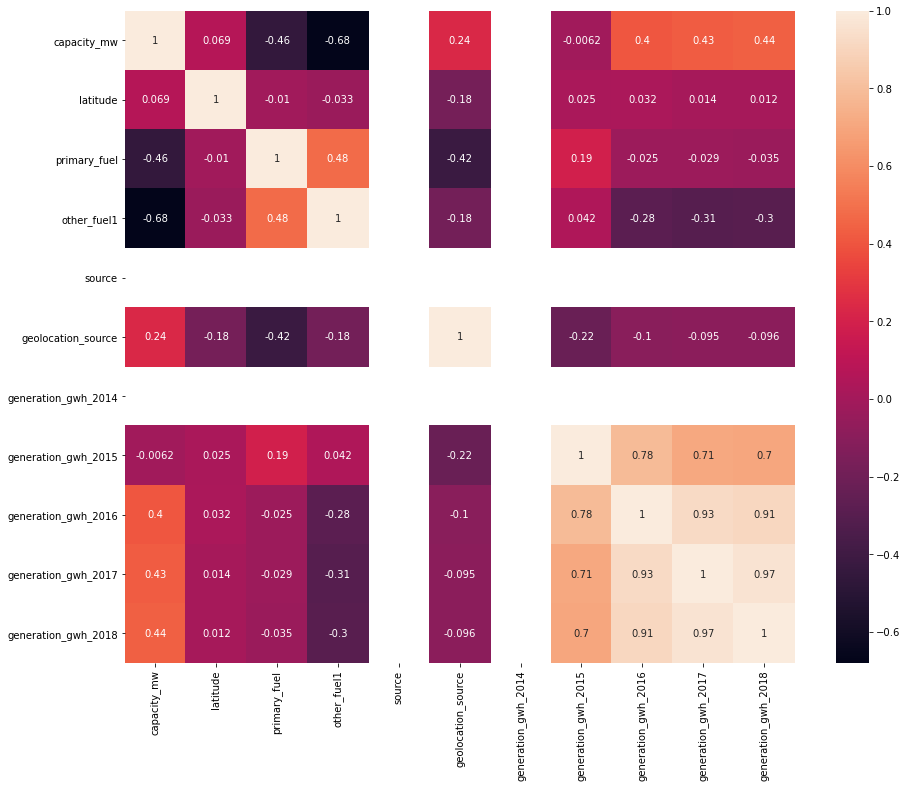

In [359]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True) 

we can see here that the there in multicoleanieratiy present  between gwh2017, gwh2018,lets fix this by removing one column

In [360]:
df.drop('generation_gwh_2017',axis=1,inplace=True)

In [361]:
df

,capacity_mw,latitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,2.50,28.1839,6,3,40.75,1,4262.51,2309.090,2467.936859,2600.804099
1,98.00,24.7663,1,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099
2,39.20,21.9038,7,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099
3,135.00,23.8712,2,3,40.75,2,4262.51,843.747,886.004428,626.239128
4,938.03,21.9603,1,2,40.75,2,4262.51,2309.090,4825.090000,5264.740000
...,...,...,...,...,...,...,...,...,...,...
902,938.03,16.2949,1,2,40.75,2,4262.51,40.750,233.596650,686.500000
903,3.00,12.8932,6,3,40.75,0,4262.51,2309.090,2467.936859,2600.804099
904,25.50,15.2758,7,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099
905,80.00,24.3500,1,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099


In [362]:
from sklearn.preprocessing import StandardScaler

In [363]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [364]:
x

,latitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,28.1839,6,3,40.75,1,4262.51,2309.090,2467.936859,2600.804099
1,24.7663,1,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099
2,21.9038,7,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099
3,23.8712,2,3,40.75,2,4262.51,843.747,886.004428,626.239128
4,21.9603,1,2,40.75,2,4262.51,2309.090,4825.090000,5264.740000
...,...,...,...,...,...,...,...,...,...
902,16.2949,1,2,40.75,2,4262.51,40.750,233.596650,686.500000
903,12.8932,6,3,40.75,0,4262.51,2309.090,2467.936859,2600.804099
904,15.2758,7,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099
905,24.3500,1,3,40.75,2,4262.51,2309.090,2467.936859,2600.804099


In [365]:
y

0        2.50
1       98.00
2       39.20
3      135.00
4      938.03
        ...  
902    938.03
903      3.00
904     25.50
905     80.00
906     16.50
Name: capacity_mw, Length: 907, dtype: float64

In [366]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [367]:
from sklearn.model_selection import train_test_split

In [368]:
trainx1,testx1,trainy1,testy1=train_test_split(x,y,test_size=0.25,random_state=100)


In [369]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [370]:
ler=LinearRegression()
ler.fit(trainx1,trainy1)
ler.score(trainx1,trainy1)


0.6248576195312732

In [371]:
print(r2_score(predlr,testy1))

-27191.93586095373


In [372]:
from sklearn.svm import SVR

In [373]:
svr=SVR()
svr.fit(trainx1,trainy1)
svr.score(trainx1,trainy1)


-0.13246403234659665

In [374]:
from sklearn.tree import DecisionTreeRegressor

In [375]:
dtr=DecisionTreeRegressor()
dtr.fit(trainx1,trainy1)
dtr.score(trainx1,trainy1)

0.9988839492746787

In [376]:
preddtr=dtr.predict(testx1)
print(r2_score(preddtr,testy1))

0.7470709418555255


In [377]:
from sklearn.ensemble import RandomForestRegressor

In [378]:
rfr=RandomForestRegressor()
rfr.fit(trainx1,trainy1)
rfr.score(trainx1,trainy1)
predrfr=rfr.predict(testx1)

In [379]:
preddtr=dtr.predict(testx1)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    lsscore=cross_val_score(dtr,x,y,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 71.09310973844134
accuracy score is: 74.44933920704845
/n
at cv: 3
cross val score is: 69.9553064543812
accuracy score is: 74.44933920704845
/n
at cv: 4
cross val score is: 70.94990303155171
accuracy score is: 74.44933920704845
/n
at cv: 5
cross val score is: 73.32716978609692
accuracy score is: 74.44933920704845
/n
at cv: 6
cross val score is: 73.16770092427576
accuracy score is: 74.44933920704845
/n
at cv: 7
cross val score is: 71.72182274934096
accuracy score is: 74.44933920704845
/n
at cv: 8
cross val score is: 71.74103335833026
accuracy score is: 74.44933920704845
/n
at cv: 9
cross val score is: 67.52751590974877
accuracy score is: 74.44933920704845
/n


In [380]:
predrfr=rfr.predict(testx1)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    lsscore=cross_val_score(rfr,x,y,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 82.02946004576243
accuracy score is: 74.44933920704845
/n
at cv: 3
cross val score is: 83.20457045855642
accuracy score is: 74.44933920704845
/n
at cv: 4
cross val score is: 83.32935972377538
accuracy score is: 74.44933920704845
/n
at cv: 5
cross val score is: 83.10965283112
accuracy score is: 74.44933920704845
/n
at cv: 6
cross val score is: 83.88543958219014
accuracy score is: 74.44933920704845
/n
at cv: 7
cross val score is: 82.86786817711604
accuracy score is: 74.44933920704845
/n
at cv: 8
cross val score is: 83.53645863057157
accuracy score is: 74.44933920704845
/n
at cv: 9
cross val score is: 82.96081260196044
accuracy score is: 74.44933920704845
/n


In [381]:
predler=ler.predict(testx1)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    lsscore=cross_val_score(ler,x,y,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 61.89818138121365
accuracy score is: 74.44933920704845
/n
at cv: 3
cross val score is: 61.35079581408066
accuracy score is: 74.44933920704845
/n
at cv: 4
cross val score is: 61.63232366242901
accuracy score is: 74.44933920704845
/n
at cv: 5
cross val score is: 61.48437825726626
accuracy score is: 74.44933920704845
/n
at cv: 6
cross val score is: 61.3802858315339
accuracy score is: 74.44933920704845
/n
at cv: 7
cross val score is: 61.32122508305827
accuracy score is: 74.44933920704845
/n
at cv: 8
cross val score is: 61.724050714031954
accuracy score is: 74.44933920704845
/n
at cv: 9
cross val score is: 61.60912638055274
accuracy score is: 74.44933920704845
/n


In [382]:
lsscore_selected=cross_val_score(rfr,x,y,cv=4).mean()
print("the cv score is:",lsscore_selected,"/nThe accuracy_score is ",lss)

the cv score is: 0.8327892994129831 /nThe accuracy_score is  0.7444933920704846
